In [77]:
import numpy as np
import pandas as pd
%matplotlib inline

In [78]:
df = pd.read_csv('C:\\Users\\Priyanka\\Desktop\\python2\\Time series\\UDEMY_TSA_FINAL\\Data\\macrodata.csv', index_col=0, parse_dates=True)

In [79]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


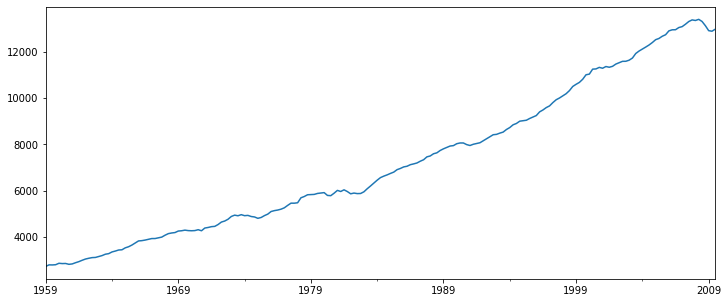

In [80]:
df['realgdp'].plot(figsize=(12,5))

In [81]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [82]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [83]:
type(gdp_trend)

pandas.core.series.Series

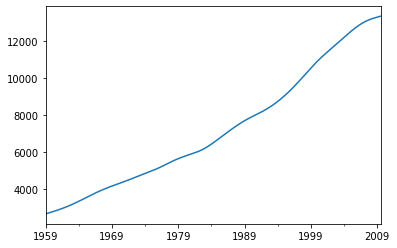

In [84]:
gdp_trend.plot()

In [85]:
df['trend'] = gdp_trend

In [86]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


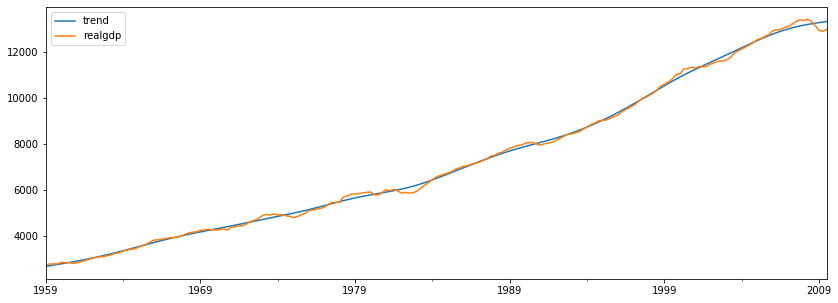

In [87]:
df[['trend', 'realgdp']].plot(figsize=(14,5))

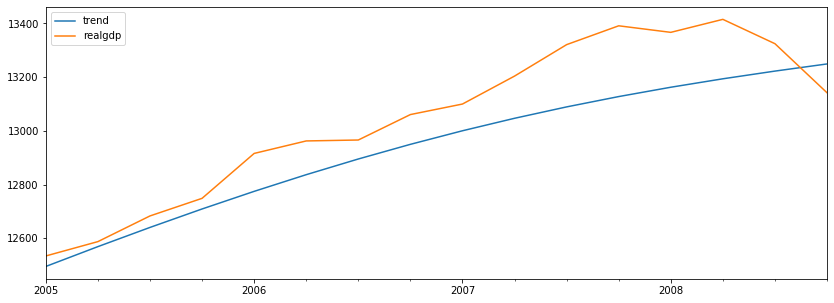

In [88]:
df[['trend', 'realgdp']]['2005-01-01':'2009-01-01'].plot(figsize=(14,5))

## ETS Decomposition              (Error Trend Seasonability)

In [89]:
airline = pd.read_csv('C:\\Users\\Priyanka\\Desktop\\python2\\Time series\\TSA_COURSE_NOTEBOOKS\\Data\\airline_passengers.csv', index_col='Month', parse_dates=True)

In [90]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [91]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [92]:
airline.dropna()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


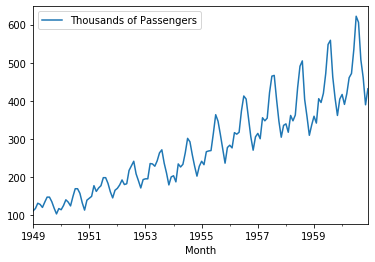

In [93]:
airline.plot();

In [94]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [95]:
result  = seasonal_decompose(airline['Thousands of Passengers'], model = 'multiplicative')

In [96]:
result

In [97]:
result.observed

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Thousands of Passengers, Length: 144, dtype: int64

In [98]:
result.resid

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: Thousands of Passengers, Length: 144, dtype: float64

In [99]:
result.trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: Thousands of Passengers, Length: 144, dtype: float64

In [100]:
result.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: Thousands of Passengers, Length: 144, dtype: float64

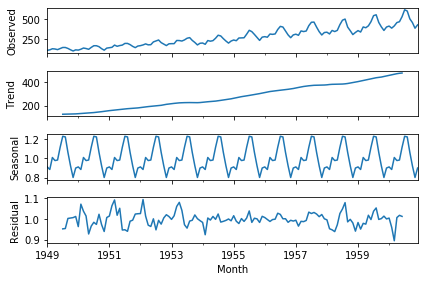

In [101]:
result.plot();

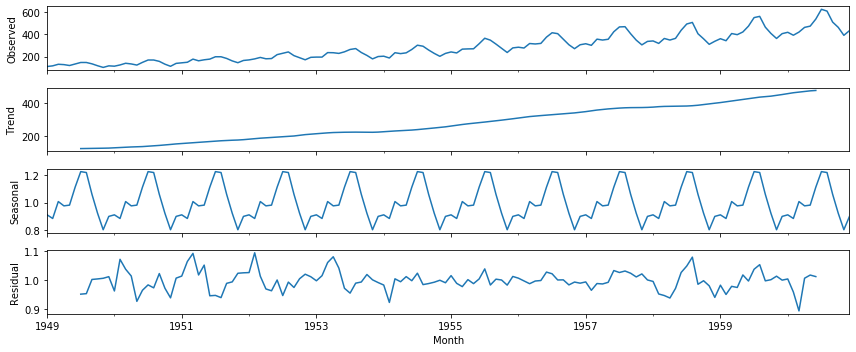

In [102]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
result.plot();

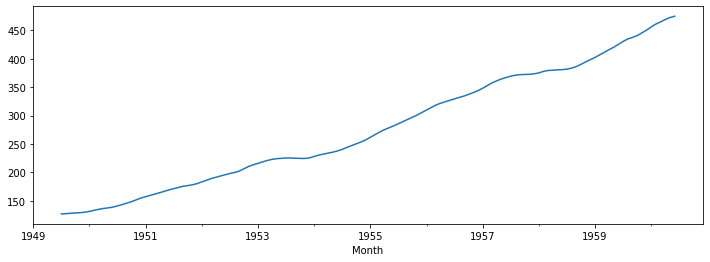

In [103]:
result.trend.plot(figsize=(12,4))

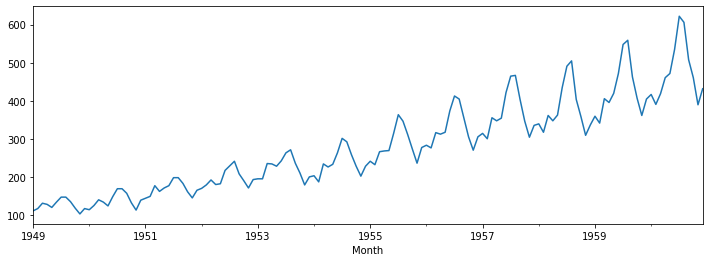

In [104]:
result.observed.plot(figsize=(12,4))

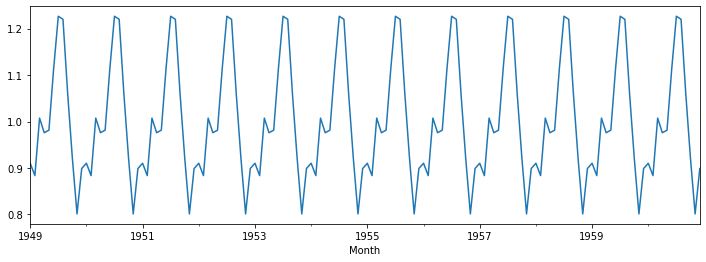

In [105]:
result.seasonal.plot(figsize=(12,4))

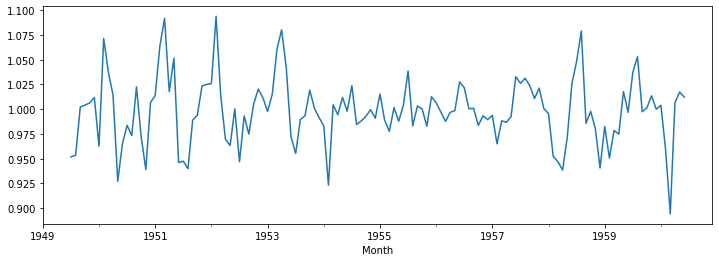

In [106]:
result.resid.plot(figsize=(12,4))

## Exponentially Weighted Moving average(EWMA)

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
airline = pd.read_csv('C:\\Users\\Priyanka\\Desktop\\python2\\Time series\\TSA_COURSE_NOTEBOOKS\\Data\\airline_passengers.csv', index_col='Month')

In [109]:
airline.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [110]:
airline.dropna(inplace=True)

In [111]:
airline.index = pd.to_datetime(airline.index)

In [112]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [113]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [114]:
airline['6-month-SMA']= airline['Thousands of Passengers'].rolling(window=6).mean()   # SMA- simple moving average

In [115]:
airline['12-month-SMA']= airline['Thousands of Passengers'].rolling(window=12).mean()

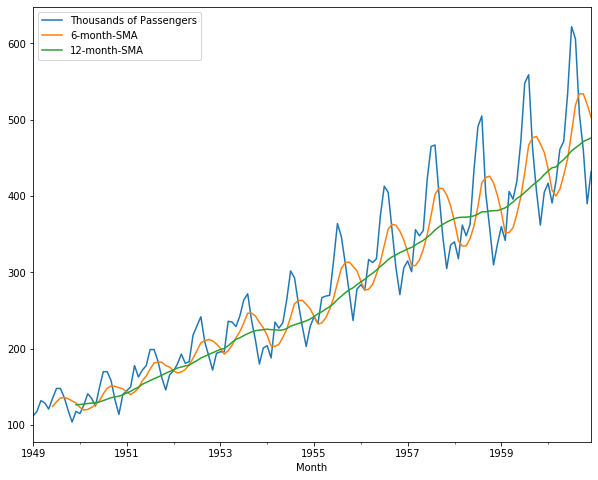

In [116]:
airline.plot(figsize=(10,8))

In [117]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

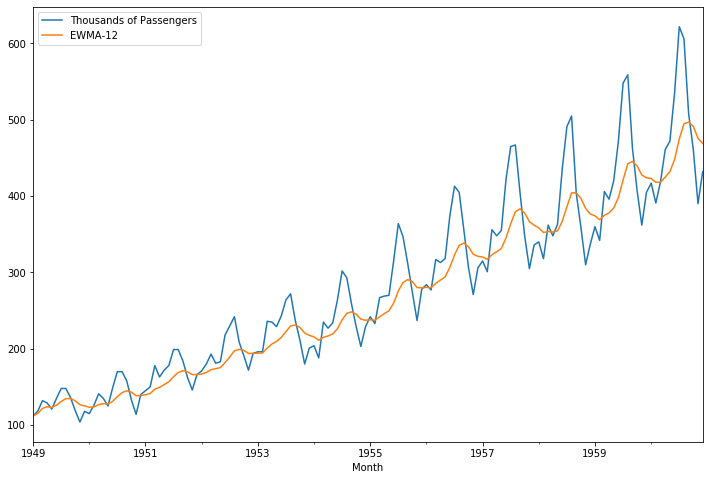

In [118]:
airline[['Thousands of Passengers', 'EWMA-12']].plot(figsize=(12,8))

## Holt-Winters Methods

In [119]:
import pandas as pd
import numpy as np
%matplotlib inline

In [120]:
df = pd.read_csv('C:\\Users\\Priyanka\\Desktop\\python2\\Time series\\UDEMY_TSA_FINAL\\Data\\airline_passengers.csv', index_col=0, parse_dates=True)

In [121]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [122]:
df.dropna(inplace=True)

In [123]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

## Setting a DatetimeIndex Frequency

In [124]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [125]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Simple Exponential Smoothing

In [126]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)



In [127]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()


In [128]:
df.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [129]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [130]:
model.fit(smoothing_level=alpha, optimized=False)

In [131]:
fitted_model=model.fit(smoothing_level=alpha, optimized=False)

In [132]:
fitted_model.fittedvalues.shift(-1)

Month
1949-01-01    112.000000
1949-02-01    112.923077
1949-03-01    115.857988
1949-04-01    117.879836
1949-05-01    118.359861
                 ...    
1960-08-01    494.898619
1960-09-01    496.914216
1960-10-01    491.388952
1960-11-01    475.790652
1960-12-01           NaN
Freq: MS, Length: 144, dtype: float64

In [133]:
df.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [134]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)

In [135]:
df.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


In [136]:
df['SES12'] = SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha, optimized=False).fittedvalues.shift(-1)

## Double Exponential Smoothing

In [137]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

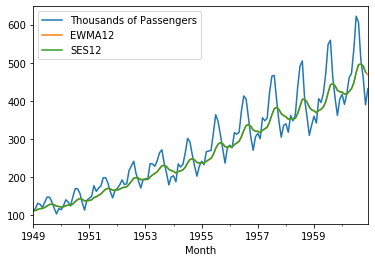

In [138]:
df.plot()

In [139]:
df['DESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.237762
1949-02-01,118,112.923077,112.923077,120.237762
1949-03-01,132,115.857988,115.857988,134.237762
1949-04-01,129,117.879836,117.879836,131.237762
1949-05-01,121,118.359861,118.359861,123.237762


In [140]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DESadd12'], dtype='object')

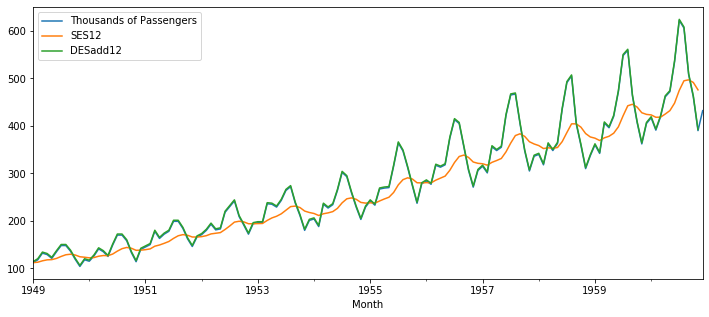

In [141]:
df[['Thousands of Passengers', 'SES12', 'DESadd12']].plot(figsize=(12,5))

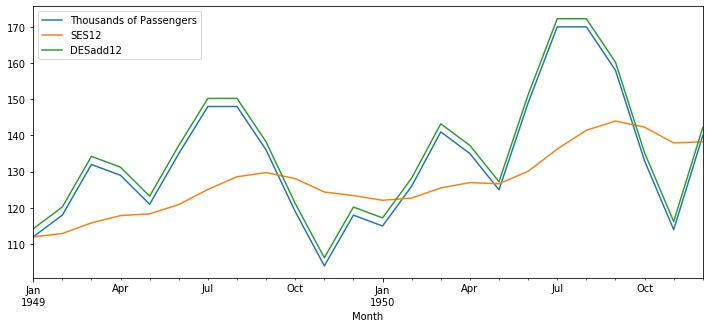

In [142]:
df[['Thousands of Passengers', 'SES12', 'DESadd12']].iloc[:24].plot(figsize=(12,5))

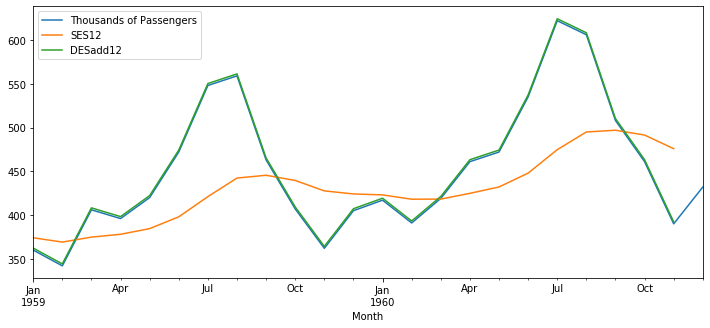

In [143]:
df[['Thousands of Passengers', 'SES12', 'DESadd12']].iloc[-24:].plot(figsize=(12,5))

In [144]:
df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.237762,112.049247
1949-02-01,118,112.923077,112.923077,120.237762,118.051885
1949-03-01,132,115.857988,115.857988,134.237762,132.058041
1949-04-01,129,117.879836,117.879836,131.237762,129.056722
1949-05-01,121,118.359861,118.359861,123.237762,121.053204


In [145]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DESadd12', 'DES_mul_12'], dtype='object')

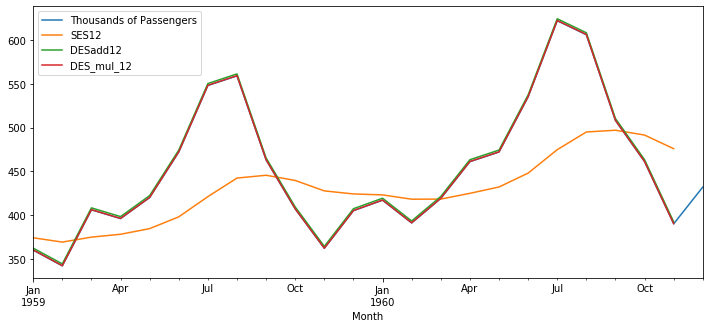

In [146]:
df[['Thousands of Passengers', 'SES12', 'DESadd12', 'DES_mul_12']].iloc[-24:].plot(figsize=(12,5))

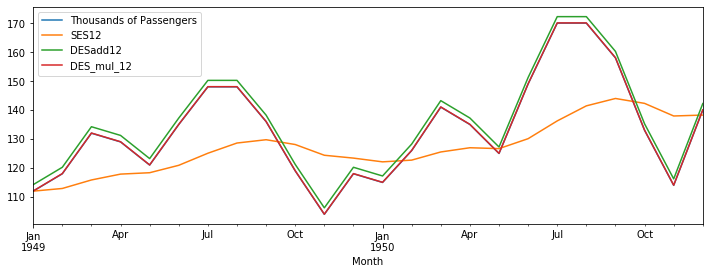

In [147]:
df[['Thousands of Passengers', 'SES12', 'DESadd12', 'DES_mul_12']].iloc[:24].plot(figsize=(12,4))

## Triple Exponential Smoothing

In [148]:
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

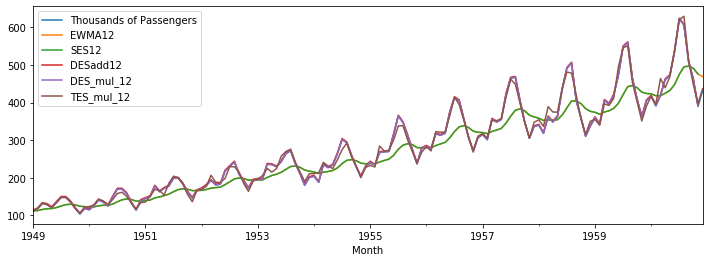

In [149]:
df.plot(figsize=(12,4))

In [150]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DESadd12', 'DES_mul_12',
       'TES_mul_12'],
      dtype='object')

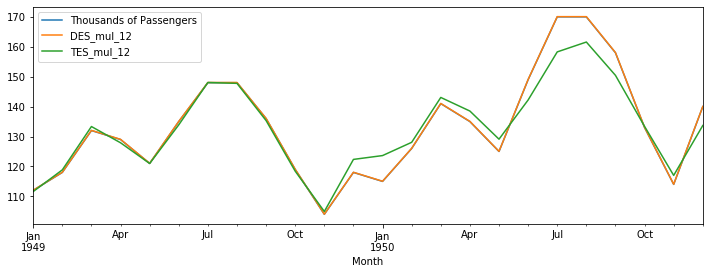

In [151]:
df[['Thousands of Passengers','DES_mul_12', 'TES_mul_12']].iloc[:24].plot(figsize=(12,4))

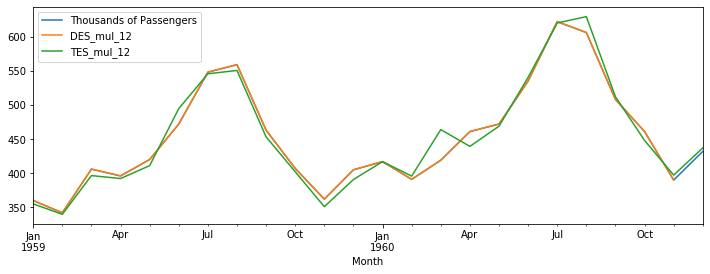

In [152]:
df[['Thousands of Passengers','DES_mul_12', 'TES_mul_12']].iloc[-24:].plot(figsize=(12,4))

##  Statsmodels Time Series Excercises

In [186]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('C:\\Users\\Priyanka\\Desktop\\python2\\Time series\\TSA_COURSE_NOTEBOOKS\\Data\\EnergyProduction.csv',index_col=0,parse_dates=True)
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


### 1. Assign a frequency of 'MS' to the DatetimeIndex.

In [187]:
df.dropna(inplace=True)

In [188]:
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq=None)

In [189]:
df.index.freq='MS'

In [190]:
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

## 2. Plot the dataset.

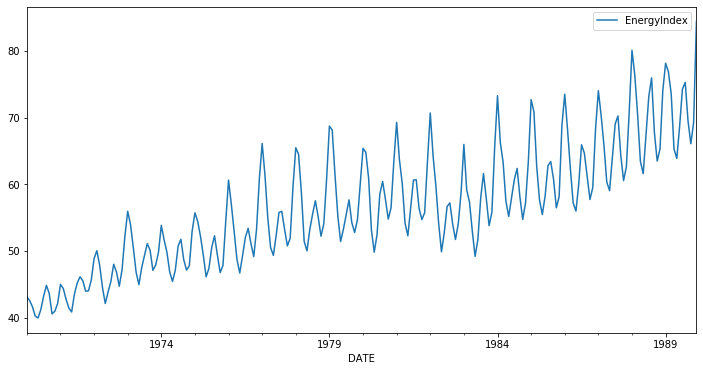

In [191]:
df.plot(figsize=(12,6));

## 3. Add a column that shows a 12-month Simple Moving Average (SMA). Plot the result.

In [192]:
df['SMA_12']=df['EnergyIndex'].rolling(window=12).mean()

In [193]:
df.head()

,EnergyIndex,SMA_12
DATE,,
1970-01-01,43.0869,NaN
1970-02-01,42.5577,NaN
1970-03-01,41.6215,NaN
1970-04-01,40.1982,NaN
1970-05-01,39.9321,NaN


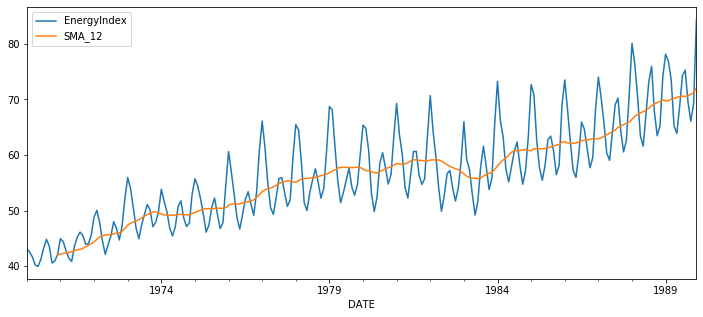

In [194]:
df.plot(figsize=(12,5))

## 4. Add a column that shows an Exponentially Weighted Moving Average (EWMA) with a span of 12 using the statsmodels SimpleExpSmoothing function. Plot the result.


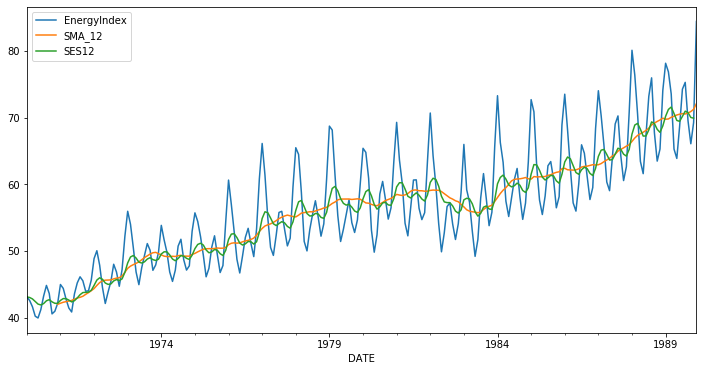

In [195]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

df['SES12']=SimpleExpSmoothing(df['EnergyIndex']).fit(smoothing_level=2/(12+1),optimized=False).fittedvalues.shift(-1)
df.plot(figsize=(12,6)).autoscale(axis='x',tight=True);



## 5. Add a column to the DataFrame that shows a Holt-Winters fitted model using Triple Exponential Smoothing with multiplicative models. Plot the result.

In [196]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


df['TES_mul_12'] = ExponentialSmoothing(df['EnergyIndex'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

C:\Users\Priyanka\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


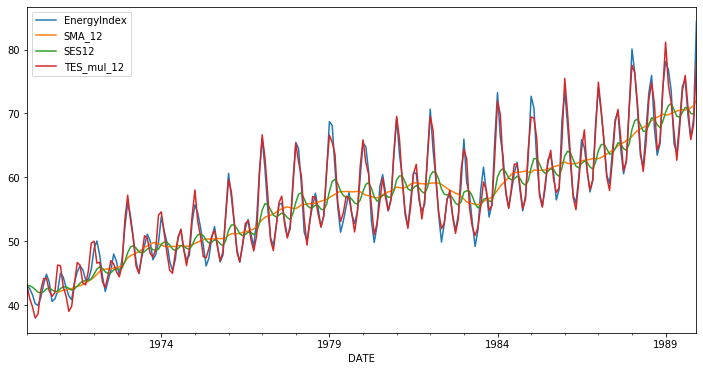

In [198]:
df.plot(figsize=(12,6)).autoscale(axis='x',tight=True);

## OPTIONAL: Plot the same as above, but for only the first two years.

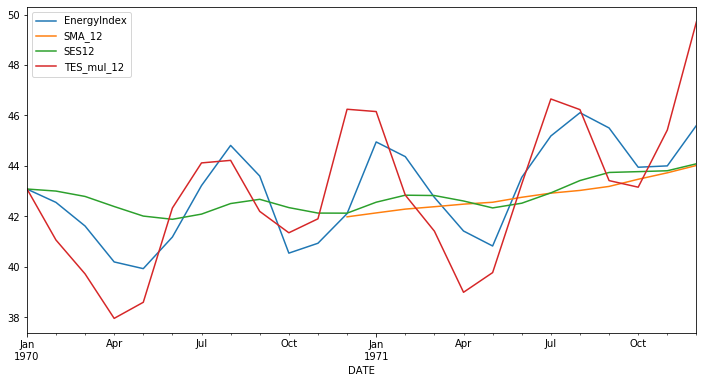

In [199]:
df.iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

## OR

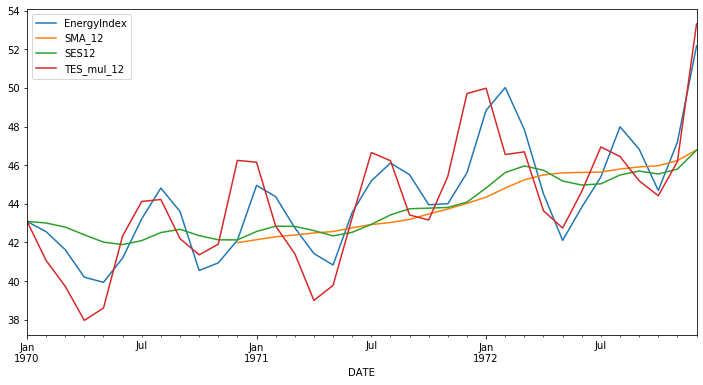

In [200]:
df[:'1972-12-01'].plot(figsize=(12,6));